In [1]:
# import datasets and functions
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [2]:
%pylab inline
pylab.rcParams['figure.figsize']=(10,6)
iris=datasets.load_iris()

Populating the interactive namespace from numpy and matplotlib


In [3]:
X=iris.data[:,[2,3]]
y=iris.target

In [4]:
iris_df=pd.DataFrame(X,columns=iris.feature_names[2:])
iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
# test tarin split
X_train, X_test,Y_train, Y_test= train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

105
45


In [6]:
#scaling the dataset
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

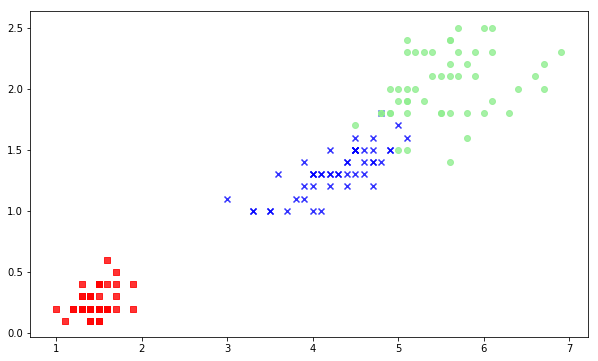

In [7]:
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1], 
                alpha=0.8, 
                c=colors[idx],
                marker=markers[idx], 
                label=cl)

In [8]:
svm=SVC(kernel='rbf',random_state=0,gamma=0.1,C=1.0)
svm.fit(X_train_std,Y_train)
print(svm.score(X_train_std,Y_train))
print(svm.score(X_test_std,Y_test))

0.9428571428571428
1.0


In [9]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    tol=0.001,
    C=1.0,)
svr.fit(X_train_std,Y_train)
svr.predict(X_test_std)

array([ 0.99083862,  0.02106792,  1.80209064,  1.16899883,  1.1620795 ,
       -0.00764436,  0.94425522,  2.0686672 ,  1.16899883,  0.91063055,
        1.95924675, -0.02032938, -0.05849342, -0.00694849, -0.0317217 ,
        1.349226  ,  2.11524282,  0.89824704,  1.00142184,  2.11790451,
       -0.01012618,  1.68090043,  0.01862429,  2.11044029,  2.06910929,
        2.08137706,  1.97844425,  2.07334604, -0.05057198, -0.01012618,
       -0.05978707, -0.00764436,  1.05193784, -0.01012618, -0.05849342,
        1.8335262 ,  1.16899883, -0.0313718 , -0.04753859, -0.00694849,
        1.8688101 ,  1.2807713 ,  1.23154263, -0.0449452 , -0.0313718 ])

In [10]:
print(svr.score(X_train_std,Y_train))
print(svr.score(X_test_std,Y_test))

0.9459413123322036
0.9787994831958373


In [11]:
## KNN
knn=KNeighborsClassifier(
    n_neighbors=10,
    weights='uniform',
    leaf_size=30,
    p=2,
    metric='minkowski',
    )
knn.fit(X_train_std, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [12]:
print(knn.score(X_train_std,Y_train))
print(knn.score(X_test_std, Y_test))

0.9428571428571428
1.0


In [2]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


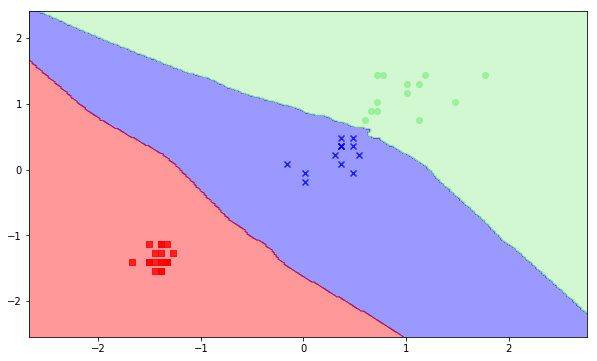

In [14]:
plot_decision_regions(X_test_std, Y_test, knn)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


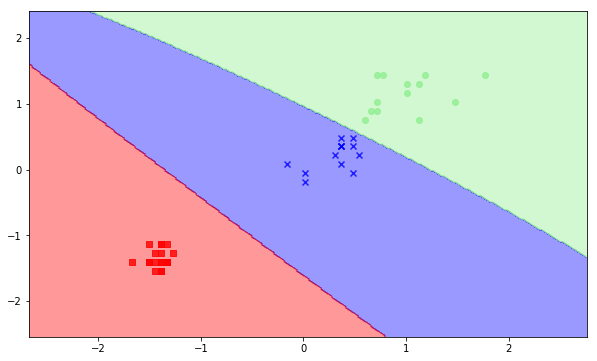

In [15]:
plot_decision_regions(X_test_std, Y_test, svm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


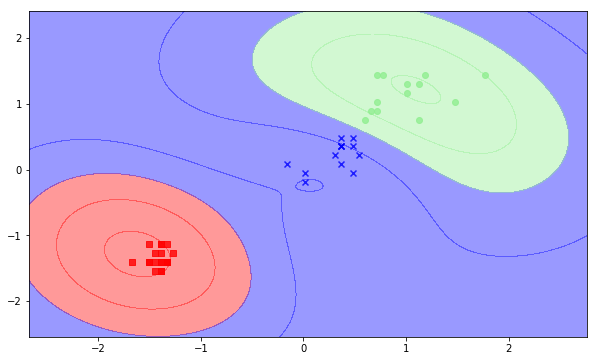

In [16]:
plot_decision_regions(X_test_std, Y_test, svr)